In [1]:
import os

from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from IPython.core.display import Image
from langgraph.checkpoint.memory import MemorySaver
from langgraph.constants import START
from langgraph.graph import MessagesState, StateGraph


load_dotenv(override=True, dotenv_path="../sample.env")

print(os.getenv("APP_NAME") or "ENV NOT LOADED")

memory = MemorySaver()
memory_config = {"configurable": {"thread_id": "1"}}


class MessageState(MessagesState):
    # predefined from langchain
    pass

def sampleStartNode(state: MessageState) -> MessageState:
    return state


TEST_AGENT


In [2]:
#assistant
def assitant(state:MessageState) -> MessageState:
    return {"messages":[llm_with_tools.invoke (state['messages'])]}


# Router is basically using tool_condition to decide either to call tools or use llm

In [3]:
def tool_uppercase(text: str) ->str:
    """
    tool_uppercase
    :param text:
    :return:
    """
    return text.upper()


llm = ChatOpenAI(model="gpt-4o-mini")
toolsList = [tool_uppercase]
llm_with_tools = llm.bind_tools(toolsList)

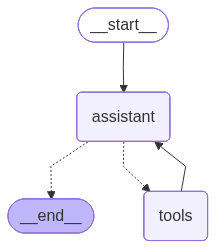

In [4]:
from langgraph.prebuilt import ToolNode, tools_condition

g = StateGraph(MessageState)
g.add_node("assistant", assitant)
g.add_node("tools", ToolNode(toolsList))

g.add_edge(START, "assistant")
g.add_conditional_edges("assistant", tools_condition)
g.add_edge("tools", "assistant")

graph = g.compile(checkpointer=MemorySaver())

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
from langchain_core.messages import HumanMessage, AIMessage

def getAIMessage(response):
    return response['messages'][-1].content

def displayAllMessages(response):
    for m in response['messages']:
        print(m.pretty_print())

message = [HumanMessage(content="change this to uppercase 'How are you?'")]

response = graph.invoke({"messages": message}, memory_config)

#rint(displayAllMessages(response))
print(getAIMessage(response))

message = [HumanMessage(content="what did I asked you to do?")]
response = graph.invoke({"messages": message}, memory_config)
print(getAIMessage(response))

The text in uppercase is: **HOW ARE YOU?**
You asked me to change the text "How are you?" to uppercase.
